In [1]:
#Import Library files to be used
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import numpy
import re
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import itertools

In [2]:
#download all puctuation and stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Ashwani
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ashwani
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#Load dataset in dataframe
data = pd.read_csv('reviews.csv')

In [4]:
#shows out initial data
data.head()

,Name,Title,Rating,Comment
0,shailesh,\n\n\n\n\n\n\n\n \n \n Samsung m31 all ro...,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Best camer...
1,Ajay KS,\n\n\n\n\n\n\n\n \n \n Best Value for Mon...,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n This is be...
2,surojit das,\n\n\n\n\n\n\n\n \n \n Poor camera\n \n,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n 3rd class ...
3,Riddham Jain,"\n\n\n\n\n\n\n\n \n \n False ads, poor ca...",1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Lets just ...
4,Anshul,\n\n\n\n\n\n\n\n \n \n Inferior quality a...,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am using...


In [5]:
data = data.drop('Name',1)
data = data.drop('Title',1)
data.shape

(8010, 2)

In [6]:
#shows first 5 rows
data.head()

,Rating,Comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Best camer...
1,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n This is be...
2,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n 3rd class ...
3,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Lets just ...
4,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am using...


In [7]:
#store only the rating, only a single integer
data['Rating'] = data['Rating'].str.split('.').str[0]
#consider rows whose coment is not NAN
data = data[data['Comment'].notna()]

In [8]:
data

,Rating,Comment
0,5,\n\n\n\n\n\n\n\n\n\n \n \n \n Best camer...
1,5,\n\n\n\n\n\n\n\n\n\n \n \n \n This is be...
2,1,\n\n\n\n\n\n\n\n\n\n \n \n \n 3rd class ...
3,1,\n\n\n\n\n\n\n\n\n\n \n \n \n Lets just ...
4,1,\n\n\n\n\n\n\n\n\n\n \n \n \n I am using...
...,...,...
8005,5,\n\n\n\n\n\n\n\n\n\n \n \n \n Pros.. Pro...
8006,5,\n\n\n\n\n\n\n\n\n\n \n \n \n Xiome mi 2...
8007,5,\n\n\n\n\n\n\n\n\n\n \n \n \n Great prod...
8008,5,\n\n\n\n\n\n\n\n\n\n \n \n \n Received i...


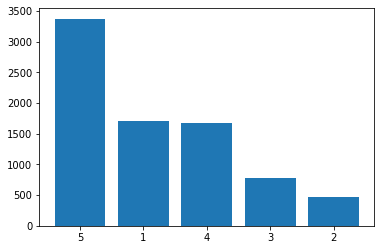

In [9]:
#visualising the data on ratings
summarised_results = data["Rating"].value_counts()
plt.bar(summarised_results.keys(), summarised_results.values)
plt.show()

In [10]:
#see the distribution of rating
data['Rating'].value_counts()

5    3375
1    1707
4    1668
3     783
2     477
Name: Rating, dtype: int64

In [11]:
#preprocessing data

#lower string
data['Comment'] = data['Comment'].str.lower()

#remove email address
data['Comment'] = data['Comment'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+','',regex=True)

#remove puctuations and special characters
data['Comment'] = data['Comment'].str.replace('[^\w\s]','')

#remove numbers
data['Comment'] = data['Comment'].replace('\d','',regex=True)

#Remove :( or :)
data['Comment'] = data['Comment'].replace(':)','')
data['Comment'] = data['Comment'].replace(':(','')

#remove whitespaces and newlines
data['Comment'] = data['Comment'].replace(r'\n','', regex=True)

data

,Rating,Comment
0,5,best camera very good battery life e...
1,5,this is best thing you can get at th...
2,1,rd class front camera mp front came...
3,1,lets just begin with the obvious thi...
4,1,i am using it from days mah batte...
...,...,...
8005,5,pros processor ram app management ca...
8006,5,xiome mi a is a wonderful item and t...
8007,5,great product at a low price with am...
8008,5,received it today and used heavily f...


In [12]:
#convert rating column from str to int
data['Rating'] = data['Rating'].astype(np.int64)

#remove the rows that have rating 3, as it is neutral
data = data[data['Rating'] !=3]

#if rating > 3 assign +1, positive sentiment
#if rating < 3 assign -1, negative sentiment
data.loc[data['Rating'] > 3, 'label'] = 1
data.loc[data['Rating'] < 3, 'label'] = -1

C:\Users\Ashwani Singh\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Ashwani Singh\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
data

,Rating,Comment,label
0,5,best camera very good battery life e...,1.0
1,5,this is best thing you can get at th...,1.0
2,1,rd class front camera mp front came...,-1.0
3,1,lets just begin with the obvious thi...,-1.0
4,1,i am using it from days mah batte...,-1.0
...,...,...,...
8005,5,pros processor ram app management ca...,1.0
8006,5,xiome mi a is a wonderful item and t...,1.0
8007,5,great product at a low price with am...,1.0
8008,5,received it today and used heavily f...,1.0


In [14]:
#see the distribution of positive and negative sentiment
data['label'].value_counts()

 1.0    5043
-1.0    2184
Name: label, dtype: int64

In [15]:
# Remove stop words using NLTK
columns = ['Comment', 'Label']
df_ = pd.DataFrame(columns = columns)
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Comment'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"Label":  row['label'],"Comment": " ".join(filtered_sentence[0:])}, ignore_index=True)
    
data = df_

In [16]:
#splits the data in train and test dataset
X_train, X_test, y_train, y_test = train_test_split(data['Comment'].values.astype('U'),data['Label'].values.astype('int32'), test_size=0.20, random_state=0)
classes = data['Label'].unique()

In [17]:
#stored in an numpy n dim-array
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5781,)
(5781,)
(1446,)
(1446,)


In [18]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2')

#tokenizes the train data
counts = vectorizer.fit_transform(X_train)

#vectorizer vectorizes the text
# contains list of words used, and their index in the vectors, vocabulary dictionary
vocab = vectorizer.vocabulary_

# Stochastic Gradient Descent classifier
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')

#labels
targets = y_train

#fits data with vectorised train data
classifier = classifier.fit(counts, targets)

# text to vectorizer to get counts
example_counts = vectorizer.transform(X_test)

# predics the label for given text/comment
predictions = classifier.predict(example_counts)

In [19]:
# Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None, labels=classes)
capture = recall_score(y_test, predictions, average=None, labels=classes)

In [20]:
#prints accuracy of model
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))

Model Accuracy:0.88
              precision    recall  f1-score   support

          -1       0.82      0.76      0.79       438
           1       0.90      0.93      0.91      1008

    accuracy                           0.88      1446
   macro avg       0.86      0.85      0.85      1446
weighted avg       0.88      0.88      0.88      1446



,Category,Index
0,1.0,1
1,-1.0,2


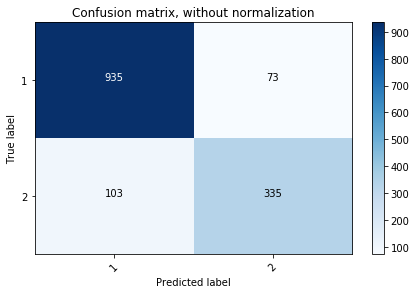

<Figure size 21.6x14.4 with 0 Axes>

In [21]:
#source: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    #print("Normalized confusion matrix")
    else:
        print()
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(0.3,0.2))
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions,classes)
np.set_printoptions(precision=2)
class_names = range(1,classes.size+1)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')
classInfo = pd.DataFrame(data=[])
for i in range(0,classes.size):
    classInfo = classInfo.append([[classes[i],i+1]],ignore_index=True)
    
classInfo.columns=['Category','Index']
classInfo

In [22]:
# confusion matrix of test dataset
print(confusion_matrix(y_test, predictions))

[[335 103]
 [ 73 935]]


In [23]:
# Let's try using the classifier to determine if a review/comment has positive or negative sentiments
# 1 means positive, whereas -1 means negative
test_1 = ['I loved it', 'I hated it', 'terrible food', 'awesome product']
test2 = vectorizer.transform(test_1)
classifier.predict(test2)

array([ 1,  1, -1,  1])